In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [96]:
data = pd.read_csv("C:/Users/DELL/Downloads/Documents/socialmedia.csv")
data

,age,gender,time_spent,platform,interests,location,demographics,profession,income,indebt,isHomeOwner,Owns_Car
0,56,male,3,Instagram,Sports,United Kingdom,Urban,Software Engineer,19774,True,False,False
1,46,female,2,Facebook,Travel,United Kingdom,Urban,Student,10564,True,True,True
2,32,male,8,Instagram,Sports,Australia,Sub_Urban,Marketer Manager,13258,False,False,False
3,60,non-binary,5,Instagram,Travel,United Kingdom,Urban,Student,12500,False,True,False
4,25,male,1,Instagram,Lifestlye,Australia,Urban,Software Engineer,14566,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...
995,22,female,8,Instagram,Lifestlye,United Kingdom,Rural,Marketer Manager,18536,False,True,False
996,40,non-binary,6,YouTube,Travel,United Kingdom,Rural,Software Engineer,12711,True,False,False
997,27,non-binary,5,YouTube,Travel,United Kingdom,Rural,Student,17595,True,False,True
998,61,female,4,YouTube,Sports,Australia,Sub_Urban,Marketer Manager,16273,True,True,False


In [109]:
from sklearn import preprocessing
from sklearn import metrics
le = preprocessing.LabelEncoder()
data[['gender','platform']] =data[['gender','platform']].apply(le.fit_transform)
data.head()

,age,gender,time_spent,platform,interests,location,demographics,profession,income,indebt,isHomeOwner,Owns_Car
0,56,1,3,1,Sports,United Kingdom,Urban,Software Engineer,19774,True,False,False
1,46,0,2,0,Travel,United Kingdom,Urban,Student,10564,True,True,True
2,32,1,8,1,Sports,Australia,Sub_Urban,Marketer Manager,13258,False,False,False
3,60,2,5,1,Travel,United Kingdom,Urban,Student,12500,False,True,False
4,25,1,1,1,Lifestlye,Australia,Urban,Software Engineer,14566,False,True,True


In [118]:
data.describe()

,age,gender,time_spent,platform,income
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,40.986000,1.001000,5.029000,1.023000,15014.823000
std,13.497852,0.814655,2.537834,0.798191,2958.628221
min,18.000000,0.000000,1.000000,0.000000,10012.000000
25%,29.000000,0.000000,3.000000,0.000000,12402.250000
50%,42.000000,1.000000,5.000000,1.000000,14904.500000
75%,52.000000,2.000000,7.000000,2.000000,17674.250000
max,64.000000,2.000000,9.000000,2.000000,19980.000000


In [119]:
X = data.iloc[:,:4]
X.head()

,age,gender,time_spent,platform
0,56,1,3,1
1,46,0,2,0
2,32,1,8,1
3,60,2,5,1
4,25,1,1,1


In [120]:
Y = data.income
Y.head()

0    19774
1    10564
2    13258
3    12500
4    14566
Name: income, dtype: int64

In [126]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.3,random_state=355)
from sklearn.linear_model import LinearRegression
mlr=LinearRegression()
mlr.fit(x_train,y_train)

LinearRegression()

In [127]:
y_predict = mlr.predict(x_test)
y_predict

array([14702.12668253, 15063.91331164, 15232.75155556, 15195.69559465,
       15016.25301783, 14923.54872014, 15152.22926994, 14659.61206123,
       15089.72956057, 14777.87872498, 15471.08473485, 15472.88458664,
       14595.31250007, 14822.45607667, 14735.20144365, 14665.65599141,
       14358.20289851, 15474.68443844, 14574.42915433, 14920.90071997,
       15092.54022079, 14904.9909834 , 15131.6088028 , 14587.73159669,
       14326.97809847, 14869.84449616, 14751.58682813, 15424.96141424,
       14353.00711672, 14546.80405787, 14539.80842429, 15202.75033325,
       15114.96053972, 15522.39484153, 15082.9466963 , 15571.90509641,
       15068.84621483, 14784.92446785, 14630.98515209, 15292.91625263,
       14858.12872869, 15569.30720552, 14608.56483315, 14598.17326956,
       14488.49831761, 15342.42650751, 14998.28995418, 14931.81804075,
       14535.62345091, 15008.14635726, 15214.51621   , 14722.90980971,
       15065.50039412, 14993.8421022 , 15444.2576775 , 14984.45235131,
      

Text(0, 0.5, 'y_pred')

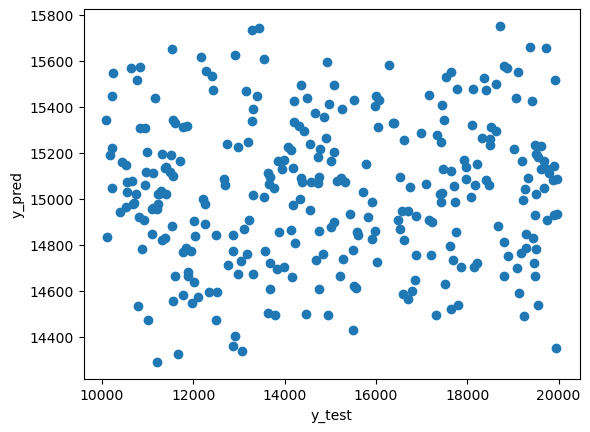

In [128]:
plt.scatter(y_test,y_predict)
plt.xlabel('y_test', fontsize=10)
plt.ylabel('y_pred', fontsize=10)

In [129]:
meanAbErr = metrics.mean_absolute_error(y_test, y_predict)
meanSqErr = metrics.mean_squared_error(y_test, y_predict)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, y_predict))
print('R squared: {:.2f}'.format(mlr.score(X,Y)*100))
print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)

R squared: 0.71
Mean Absolute Error: 2580.417808909153
Mean Square Error: 8822217.217258614
Root Mean Square Error: 2970.2217454692864


In [130]:
print(mlr.score(x_test,y_test))

-0.0012232131624871911
